In [1]:
#genes found to be significant:
#total- NLGN4Y, YPEL3, TUFM,TUBGCP5, GNB1L, AIFM3
#comm- ZG16, GDPD3, YPEL3, PRRT2, TUBGCP5, DOC2A, RTN4R, TBX1
#social- NLGN4Y, YPEL3, TUFM, TUBGCP5, GNB1L, AIFM3
#rrb- NLGN4Y, TXNRD2, AIFM3

In [2]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [3]:
cd ../../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [4]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [5]:
#load in cmat data
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_mu.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [6]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [7]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
122


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 122/122 [00:12<00:00,  9.55it/s]


(122, 699)

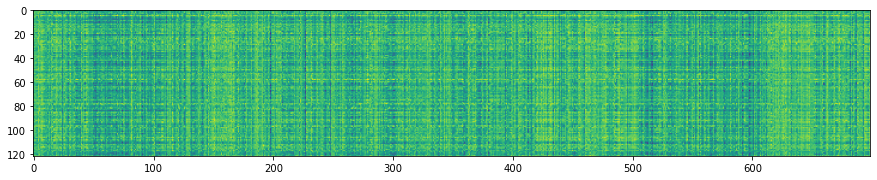

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)
gene_fmri_corr.shape

In [10]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_total = ~np.isnan(Y_total)[:,col_id]
Y_use_total = Y_total[good_subjects_total,col_id] 
X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()
regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 
Y_use_hat_total = linear_regression_total.predict(X_use_total)

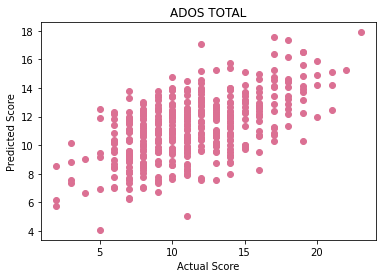

In [11]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='palevioletred')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [12]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

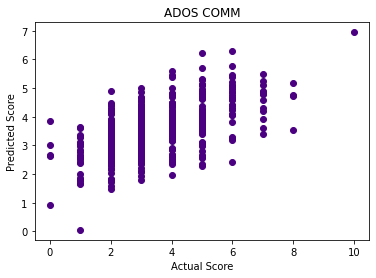

In [13]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='indigo')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [14]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

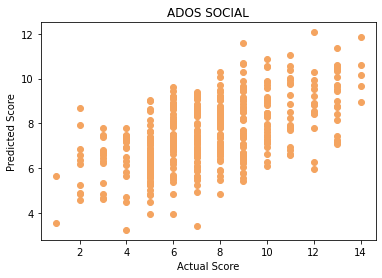

In [15]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='sandybrown')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [16]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

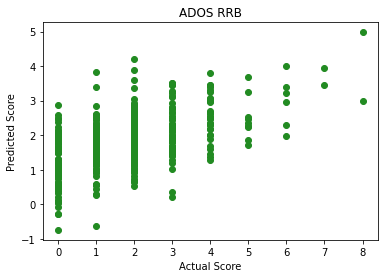

In [17]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='forestgreen')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [18]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

32.67853800395565


In [19]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

33.150612659883386


In [20]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

32.05400060843247


In [21]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

29.620860942371795


Text(0.5, 0, 'Symptom')

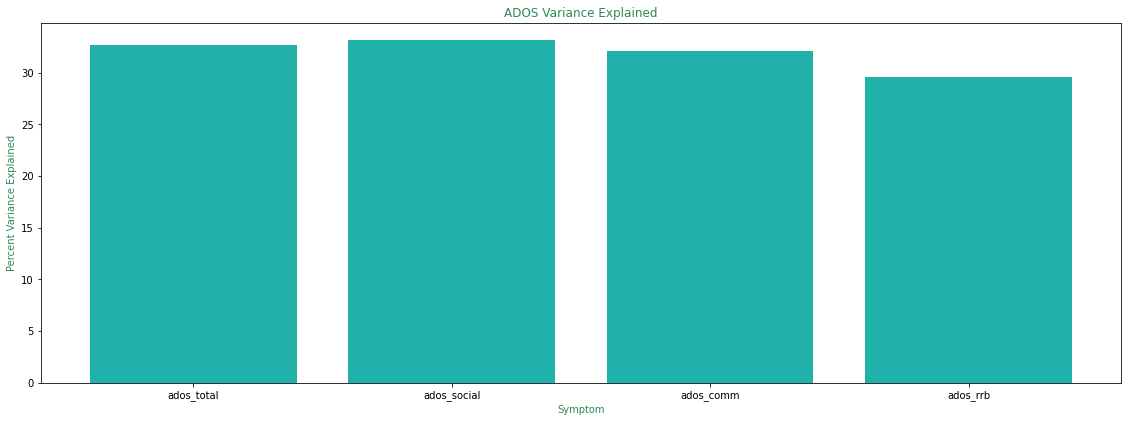

In [22]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='lightseagreen')
plt.title('ADOS Variance Explained',color='seagreen')
plt.ylabel('Percent Variance Explained',color='seagreen')
plt.xlabel('Symptom',color='seagreen')

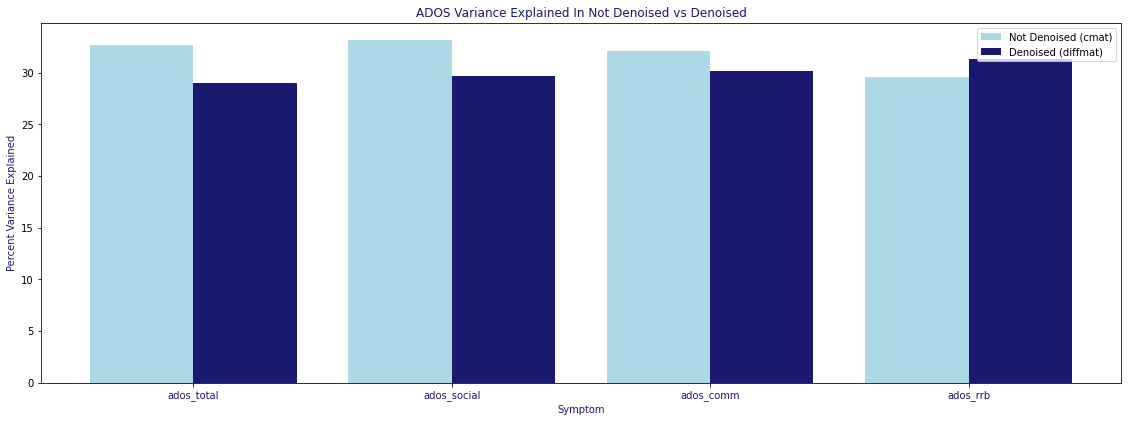

In [24]:
#variance explained of denoised vs not denoised
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
x_axis = np.arange(len(ados_label))

#not denoised is asd_mu
not_denoised = var_explained

#denoised is diffmat
denoised = [28.95418226789308,29.655208682977406,30.198403453072608,31.359801027961907]

#plot bar graph
plt.bar(x_axis-0.2,not_denoised,0.4,label='Not Denoised (cmat)',color='lightblue')
plt.bar(x_axis+0.2,denoised,0.4,label='Denoised (diffmat)',color='midnightblue')
plt.title('ADOS Variance Explained In Not Denoised vs Denoised',color='midnightblue')
plt.xticks(x_axis, ados_label,color='midnightblue')
plt.xlabel('Symptom',color='midnightblue')
plt.ylabel('Percent Variance Explained',color='midnightblue')
plt.legend()
plt.show()

In [27]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['CDIPT','TXNRD2','CORO1A','ATXN2L','USP41','COMT','CLDN4','CLDN3','CRKL','ZG16','ELN','EN2','ALDOA','NLGN4Y','POGZ','CYFIP1','FMO5','FMR1','QPRT','TSSK2','SH2B1','CNTNAP2','DGCR5','SEZ6L2','TBL2','TRMT2A','LAT','GJA5','GJA8','GP1BB','GSC2','GTF2I','ZDHHC8','SERPIND1','MLXIPL','ACP6','GPR89B','MED15','TREM2','NLGN3','DGCR8','GNB1L','IL6','NLGN4X','CHD8','KIF22','LIMK1','MAZ','MRPL40','RTN4R','MECP2','ARVCF','MET','ATP2A1','OXTR','PPP4C','GDPD3','PRKAB2','MAPK3','RABEP2','PRODH','RELN','NIPA2','ABHD11','YPEL3','SPNS1','DNAJC30','RANBP1','KLHL22','NFATC2IP','RFC2','SHANK3','DGCR6L','SCARF2','BCL9','SGSH','SLC6A4','SLC7A4','SLC25A1','SPN','CDKL5','STX1A','SYN2','TBX1','CLDN5','TUFM','HIRA','UFD1L','EIF4H','CLIP2','LAT2','ZNF74','PRRT2','WBSCR22','TUBGCP5','NIPA1','TMEM219','C22orf39','WBSCR28','AIFM3','WBSCR27','VPS37D','LZTR1','CLTCL1','CDC45','FZ9D','DOC2A','FKBP6','HIRIP3','BAZ1B','P2RX6','KCTD13','ASPHD1','BCL7B','SNAP29','TAOK2','NRXN1','CD19','CHD1L','GTFIRD1','MVP','DGCR2']
print(column_total)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_total[i]}')

ados_total

CDIPT,-36.893911489338386
TXNRD2,62.97036592575955
CORO1A,-11.453356107599674
ATXN2L,-37.492227395943296
USP41,-39.1220019989869
COMT,2.2951375674632275
CLDN4,16.408448472075555
CLDN3,21.70584413215412
CRKL,-7.811897940879529
ZG16,52.34438039120661
ELN,28.88959604607563
EN2,-45.654265707791104
ALDOA,69.54829009675618
NLGN4Y,-39.40197021534652
POGZ,-93.52071853225279
CYFIP1,43.88422019346808
FMO5,25.00014385730562
FMR1,24.87615757756012
QPRT,-52.68202880189368
TSSK2,43.621094135512834
SH2B1,98.37921993632175
CNTNAP2,-62.55545406065865
DGCR5,47.14319330475143
SEZ6L2,41.3000004564469
TBL2,-22.961908926347537
TRMT2A,-11.183913484569343
LAT,68.68068652169003
GJA5,-30.655947007263908
GJA8,18.465530739693122
GP1BB,-107.7158823705958
GSC2,-8.62173354062399
GTF2I,-73.05901422392776
ZDHHC8,-61.79506539230026
SERPIND1,19.03825493046813
MLXIPL,79.96999373329322
ACP6,3.28955528124974
GPR89B,-6.741670962791364
MED15,82.66642030580931
TREM2,23.85617738880113
NLGN3,-22.097255410336683
DGCR

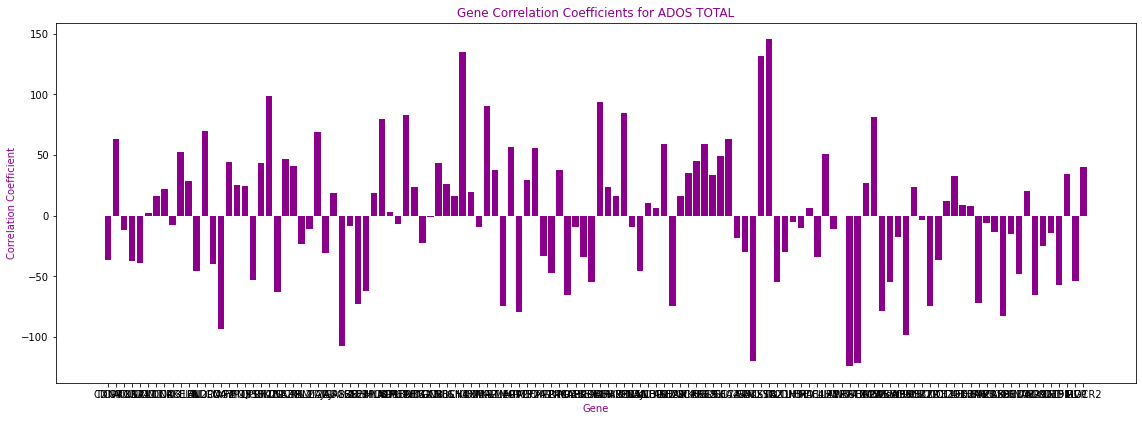

In [28]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='darkmagenta')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='darkmagenta')
plt.ylabel('Correlation Coefficient',color='darkmagenta')
plt.xlabel('Gene',color='darkmagenta')
plt.show()

In [29]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
print(column_comm)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_comm[i]}')

ados_comm

CDIPT,-42.35764668814548
TXNRD2,14.564713555888478
CORO1A,14.197816571556016
ATXN2L,-32.86071878176204
USP41,-19.88694728286331
COMT,-3.613875771064209
CLDN4,7.050707299664587
CLDN3,9.10871829975421
CRKL,8.242038720543047
ZG16,43.728943903518335
ELN,21.269588082892536
EN2,-3.4681759015426645
ALDOA,65.23144254015975
NLGN4Y,-11.000288367688595
POGZ,-14.257330055193451
CYFIP1,9.844942178438515
FMO5,2.767661905927737
FMR1,11.06095034248184
QPRT,-18.93541532483811
TSSK2,10.386521888516967
SH2B1,80.25986884414745
CNTNAP2,-60.675716125392256
DGCR5,30.672143719712857
SEZ6L2,29.887806082935217
TBL2,-19.141320340505338
TRMT2A,-21.919399447046246
LAT,29.261568184507983
GJA5,-2.537743857097649
GJA8,16.153906889033088
GP1BB,-45.03739711134847
GSC2,-10.884051977978137
GTF2I,-47.355911853627866
ZDHHC8,-2.484087913157219
SERPIND1,4.8777174248355655
MLXIPL,35.90998227027799
ACP6,3.278580271552731
GPR89B,12.39523288061843
MED15,33.43132293124063
TREM2,6.353976770816977
NLGN3,-20.5241292639961

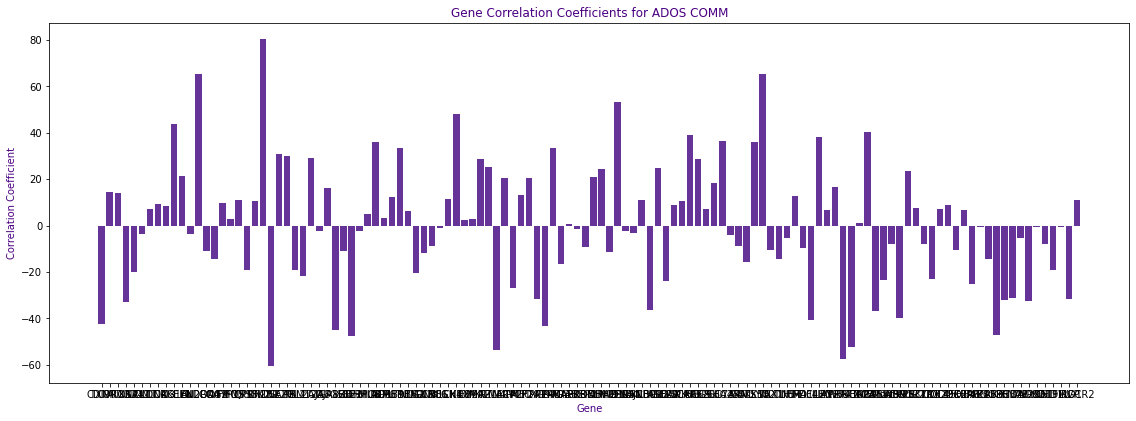

In [30]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='rebeccapurple')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='indigo')
plt.ylabel('Correlation Coefficient',color='indigo')
plt.xlabel('Gene',color='indigo')
plt.show()

In [31]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
print(column_social)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_social[i]}')

ados_social

CDIPT,3.3898418947815276
TXNRD2,60.99186154769597
CORO1A,-16.46522670069483
ATXN2L,-28.546392733913837
USP41,-18.36661603197211
COMT,0.2991290458807361
CLDN4,33.48781724997711
CLDN3,0.20509553803453467
CRKL,-11.414451586978744
ZG16,17.38163633581348
ELN,13.905848938924692
EN2,-32.313231692320485
ALDOA,17.699167183377917
NLGN4Y,-16.359937551198346
POGZ,-72.7304040766753
CYFIP1,35.4317621802031
FMO5,28.647480044683345
FMR1,-15.071429417880143
QPRT,-28.498361803914094
TSSK2,44.86086343383936
SH2B1,27.06232474435269
CNTNAP2,4.05072423327216
DGCR5,7.815135159318572
SEZ6L2,9.255871019968385
TBL2,-19.654283627818433
TRMT2A,16.720176718606286
LAT,53.68496935667346
GJA5,-30.847386542900097
GJA8,-6.802780510981377
GP1BB,-62.27149176175213
GSC2,8.029015938416965
GTF2I,-31.641166939182895
ZDHHC8,-59.55832281762362
SERPIND1,9.811901977870908
MLXIPL,62.754102077948495
ACP6,-0.5021308957738669
GPR89B,-28.055987265648103
MED15,23.736192707260457
TREM2,15.36280645813063
NLGN3,-10.715163342

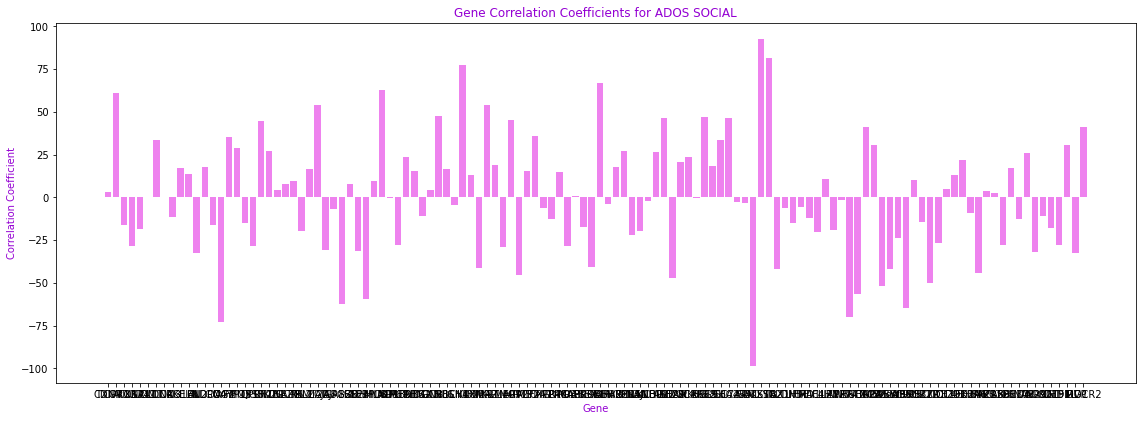

In [32]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='violet')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='darkviolet')
plt.ylabel('Correlation Coefficient',color='darkviolet')
plt.xlabel('Gene',color='darkviolet')
plt.show()

In [33]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
print(column_rrb)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_rrb[i]}')

ados_rrb

CDIPT,-21.48194538210636
TXNRD2,53.74396322541489
CORO1A,1.1240006381914653
ATXN2L,7.703926646186157
USP41,0.5369050555721804
COMT,23.39595499269046
CLDN4,-1.437670188813324
CLDN3,9.811757271379285
CRKL,27.087727871224416
ZG16,10.233737046318058
ELN,-13.778421412070328
EN2,-70.6781923677911
ALDOA,-5.088895219563074
NLGN4Y,13.385507821034974
POGZ,-9.016492031976023
CYFIP1,11.477576932394612
FMO5,23.098992923851963
FMR1,0.5448479648321619
QPRT,-3.337174162394062
TSSK2,-0.1663670185157674
SH2B1,26.99865230421423
CNTNAP2,19.32204483146542
DGCR5,-37.05322857672071
SEZ6L2,16.908750358498434
TBL2,-3.2314138546030184
TRMT2A,-23.320642016958914
LAT,3.821654995082552
GJA5,-3.1435802738640244
GJA8,8.380279814678627
GP1BB,-10.750706294572636
GSC2,-14.381237367059157
GTF2I,-51.52053835772339
ZDHHC8,-13.255672200757298
SERPIND1,10.522207932957109
MLXIPL,33.83339434476183
ACP6,-13.625668988563696
GPR89B,-11.217606215073074
MED15,-36.507484875697045
TREM2,13.601582393685671
NLGN3,9.693726970

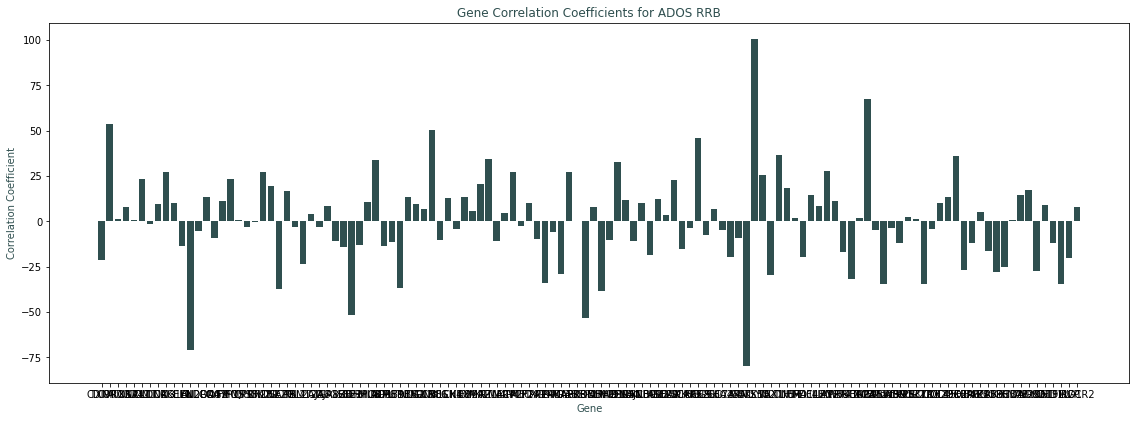

In [35]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='darkslategrey')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='darkslategrey')
plt.ylabel('Correlation Coefficient',color='darkslategrey')
plt.xlabel('Gene',color='darkslategrey')
plt.show()

In [36]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

ADOS_TOTAL
(429, 123)
(429,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.218
Date:                Mon, 28 Nov 2022   Prob (F-statistic):             0.0905
Time:                        21:29:21   Log-Likelihood:                -1104.9
No. Observations:                 429   AIC:                             2456.
Df Residuals:                     306   BIC:                             2955.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7033  

In [56]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(50,20))
    plt.bar(xs_total,coef_total,color='lightcoral')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='maroon')
    plt.xticks(xs_total,labels=labels);

Text(0.5, 0, 'Gene')

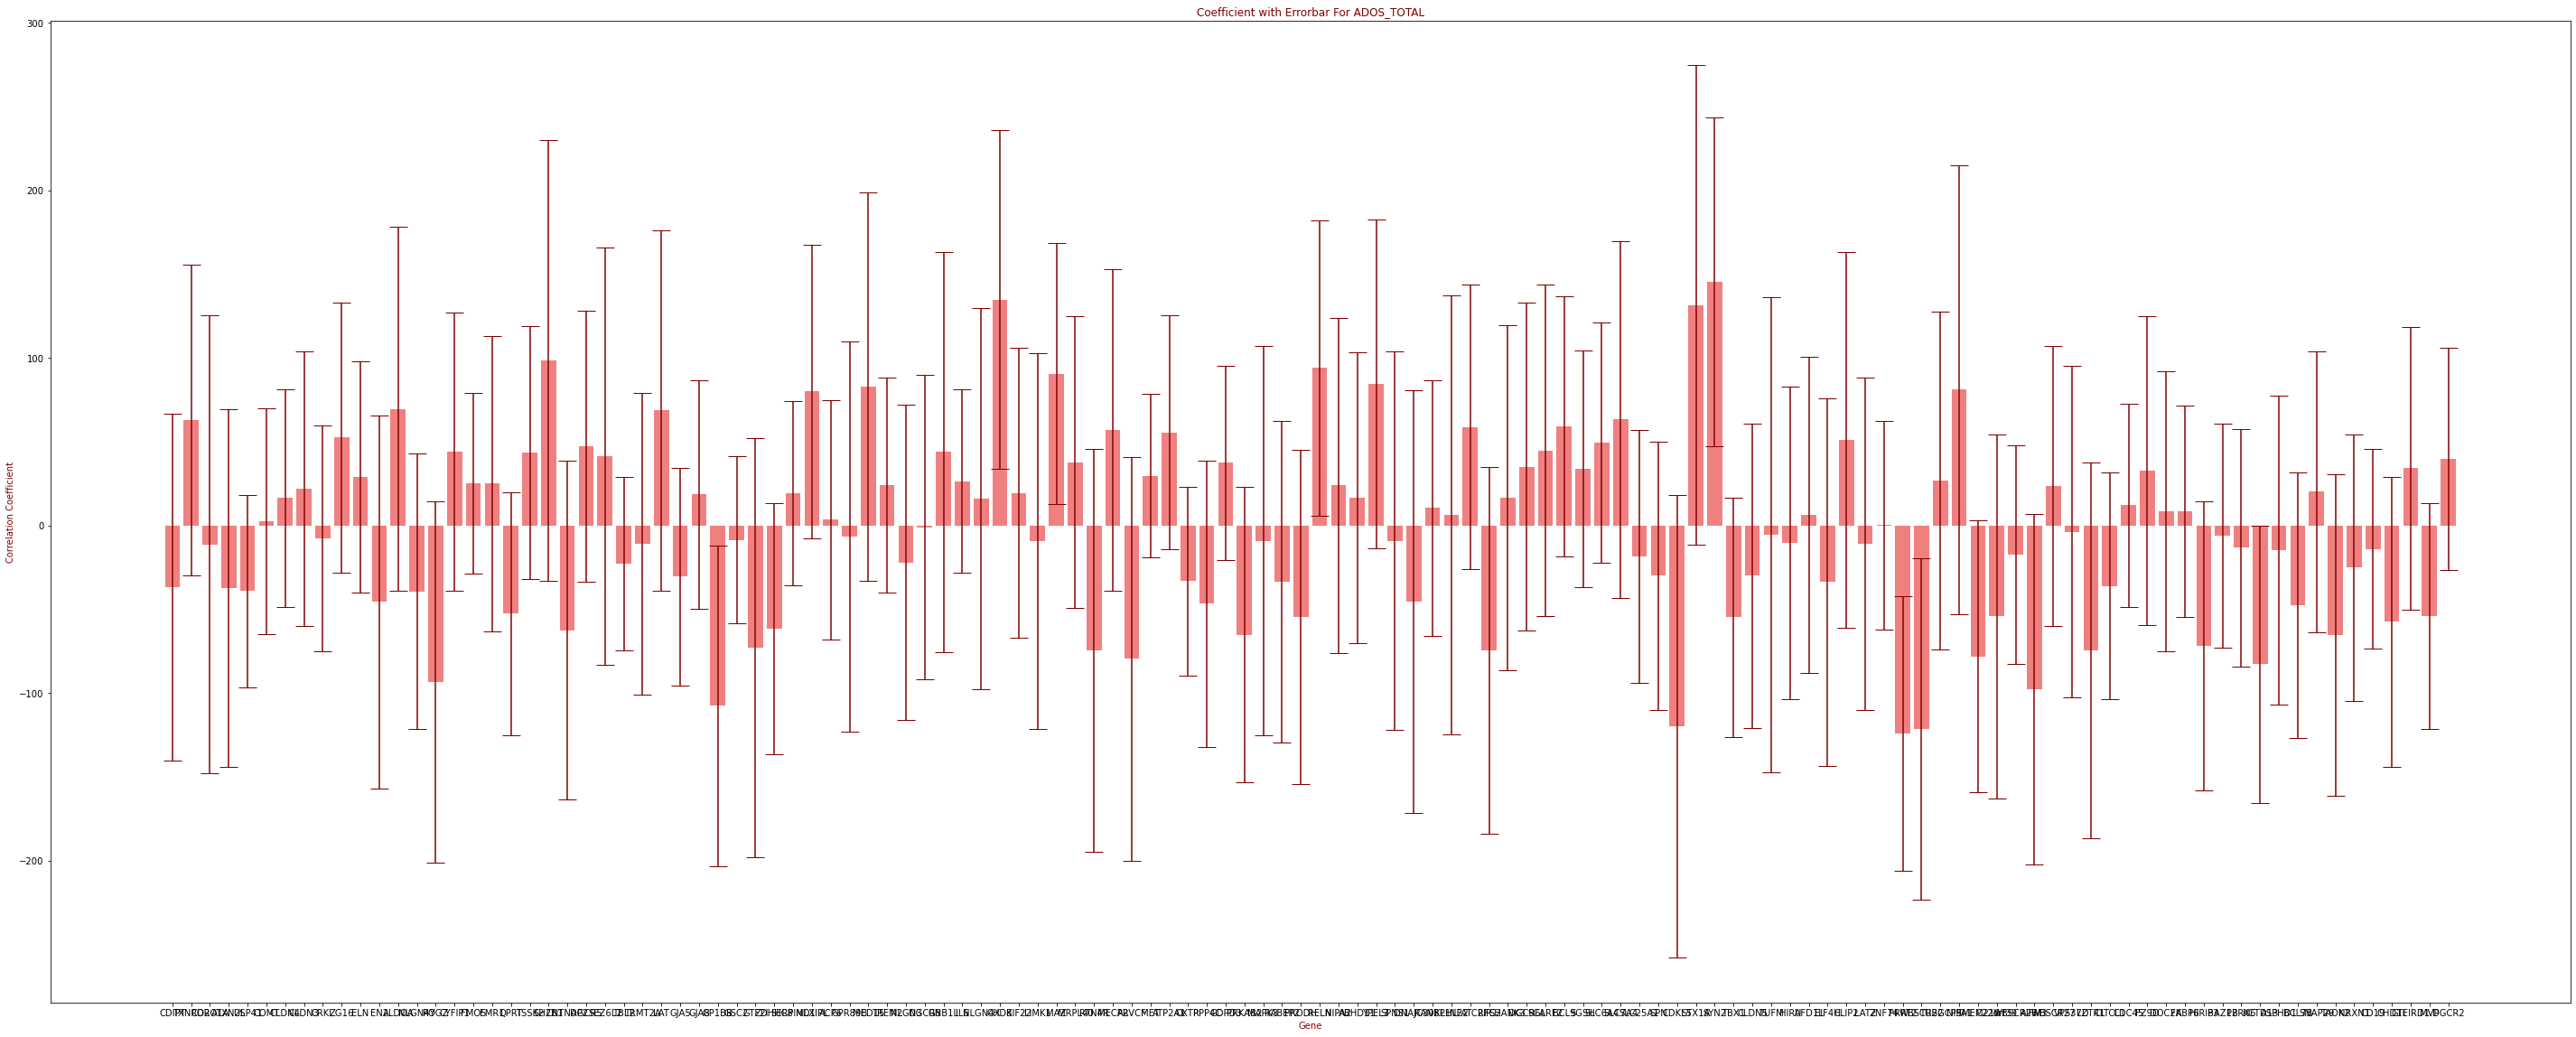

In [57]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='maroon')
plt.ylabel('Correlation Coefficient',color='maroon')
plt.xlabel('Gene',color='maroon')

In [58]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

ADOS_COMM
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.171
Date:                Mon, 28 Nov 2022   Prob (F-statistic):              0.144
Time:                        21:33:24   Log-Likelihood:                -691.85
No. Observations:                 411   AIC:                             1630.
Df Residuals:                     288   BIC:                             2124.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8179      1.171      2.40

In [59]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(50,20))
    plt.bar(xs_comm,coef_comm,color='thistle')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='indigo')
    plt.xticks(xs_comm,labels=labels);

Text(0.5, 0, 'Gene')

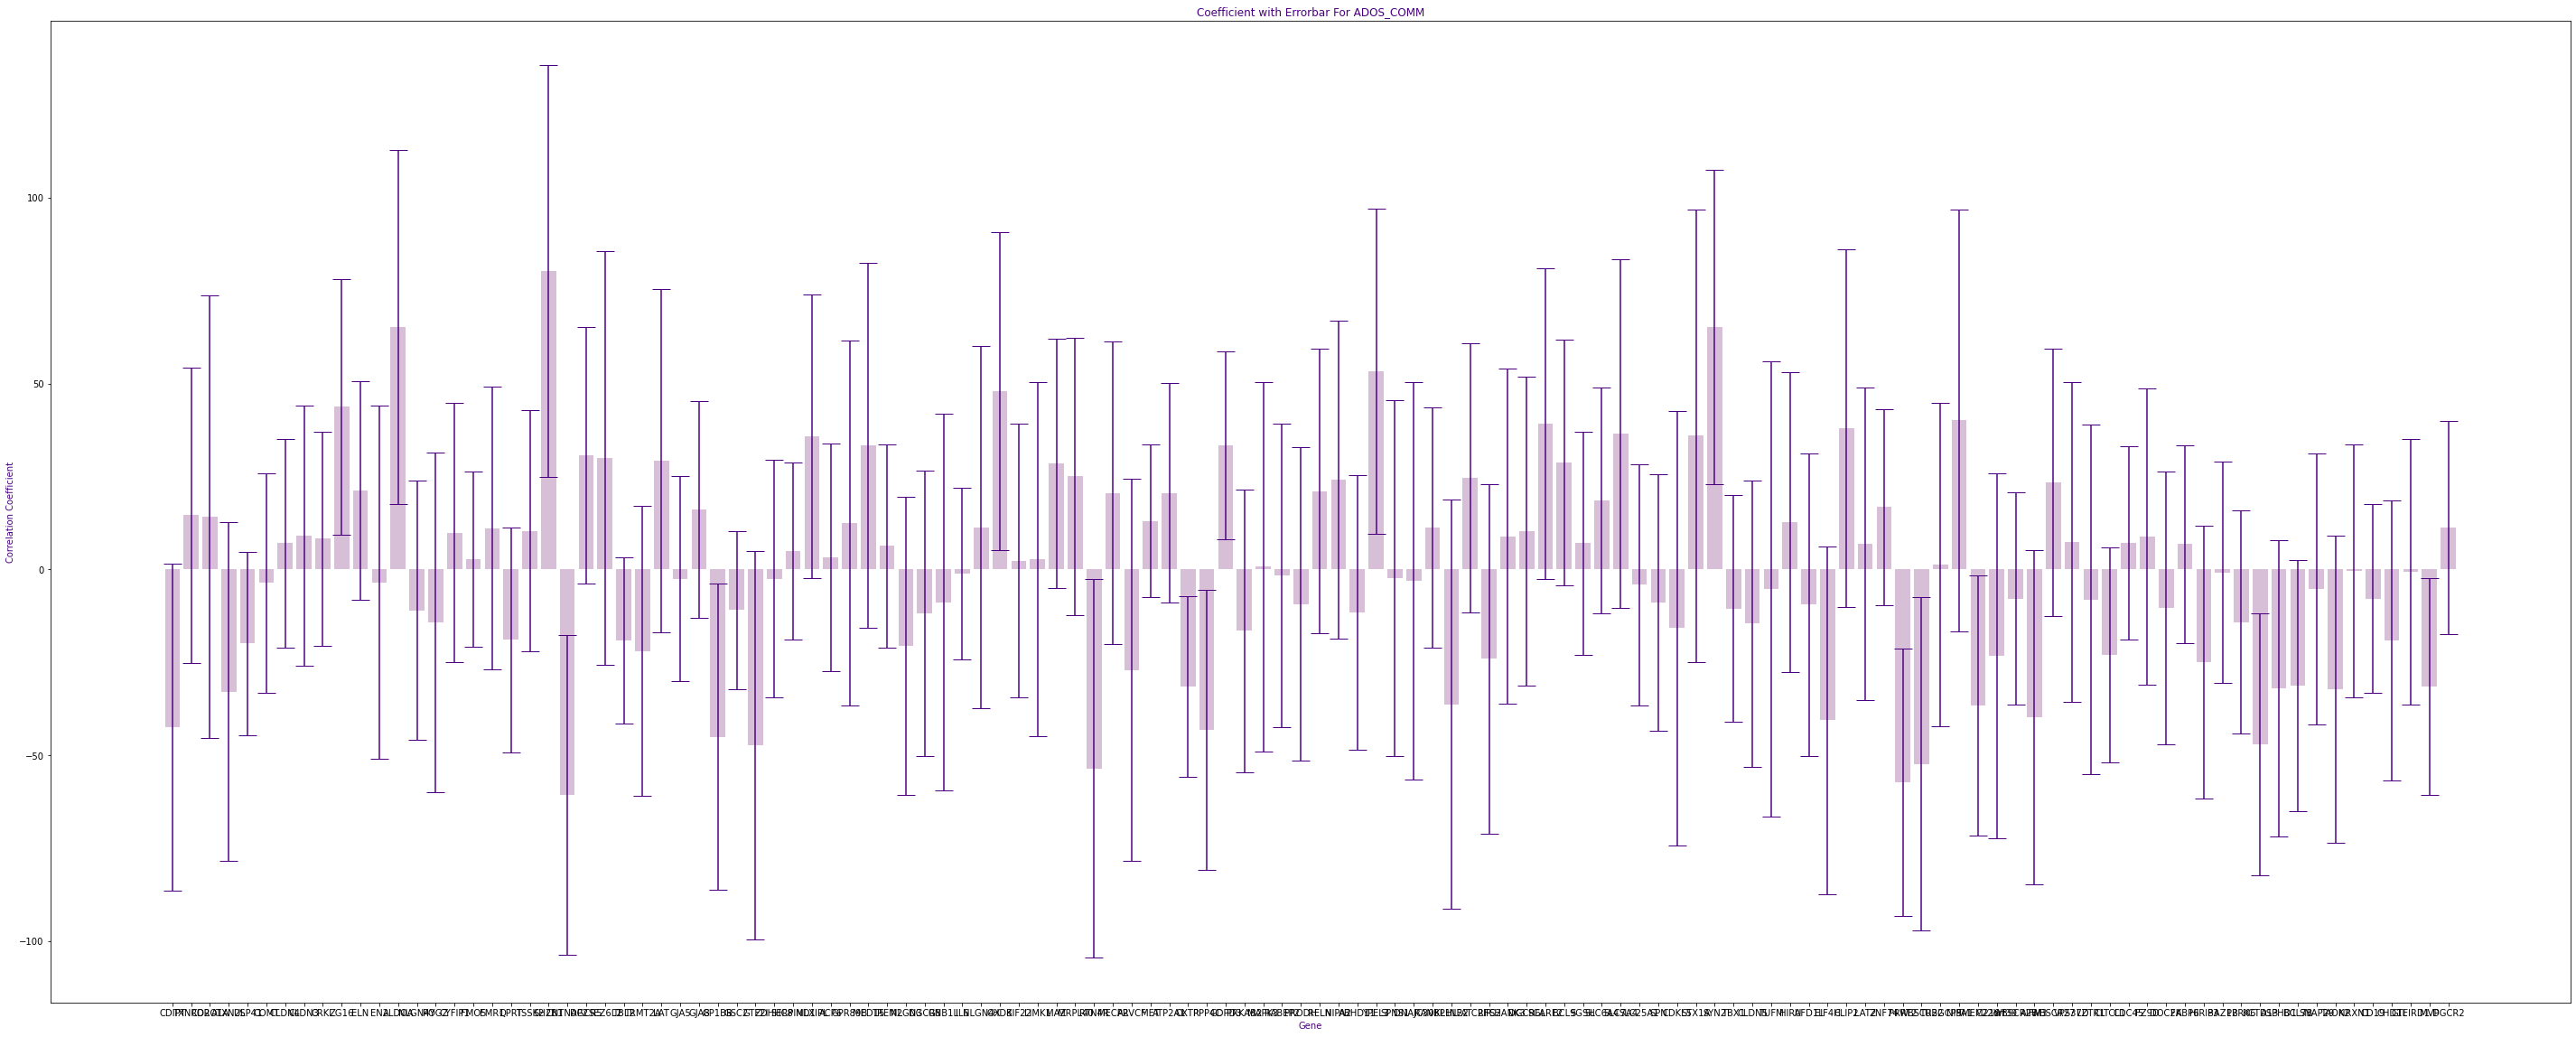

In [60]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='indigo')
plt.ylabel('Correlation Coefficient',color='indigo')
plt.xlabel('Gene',color='indigo')

In [61]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est_social.fit()
print(est2_social.summary())

ADOS_SOCIAL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.118
Date:                Mon, 28 Nov 2022   Prob (F-statistic):              0.226
Time:                        21:33:30   Log-Likelihood:                -918.66
No. Observations:                 412   AIC:                             2083.
Df Residuals:                     289   BIC:                             2578.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8378      2.007      4.

In [62]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(50,20))
    plt.bar(xs_social,coef_social,color='powderblue')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='midnightblue')
    plt.xticks(xs_social,labels=labels);

Text(0.5, 0, 'Gene')

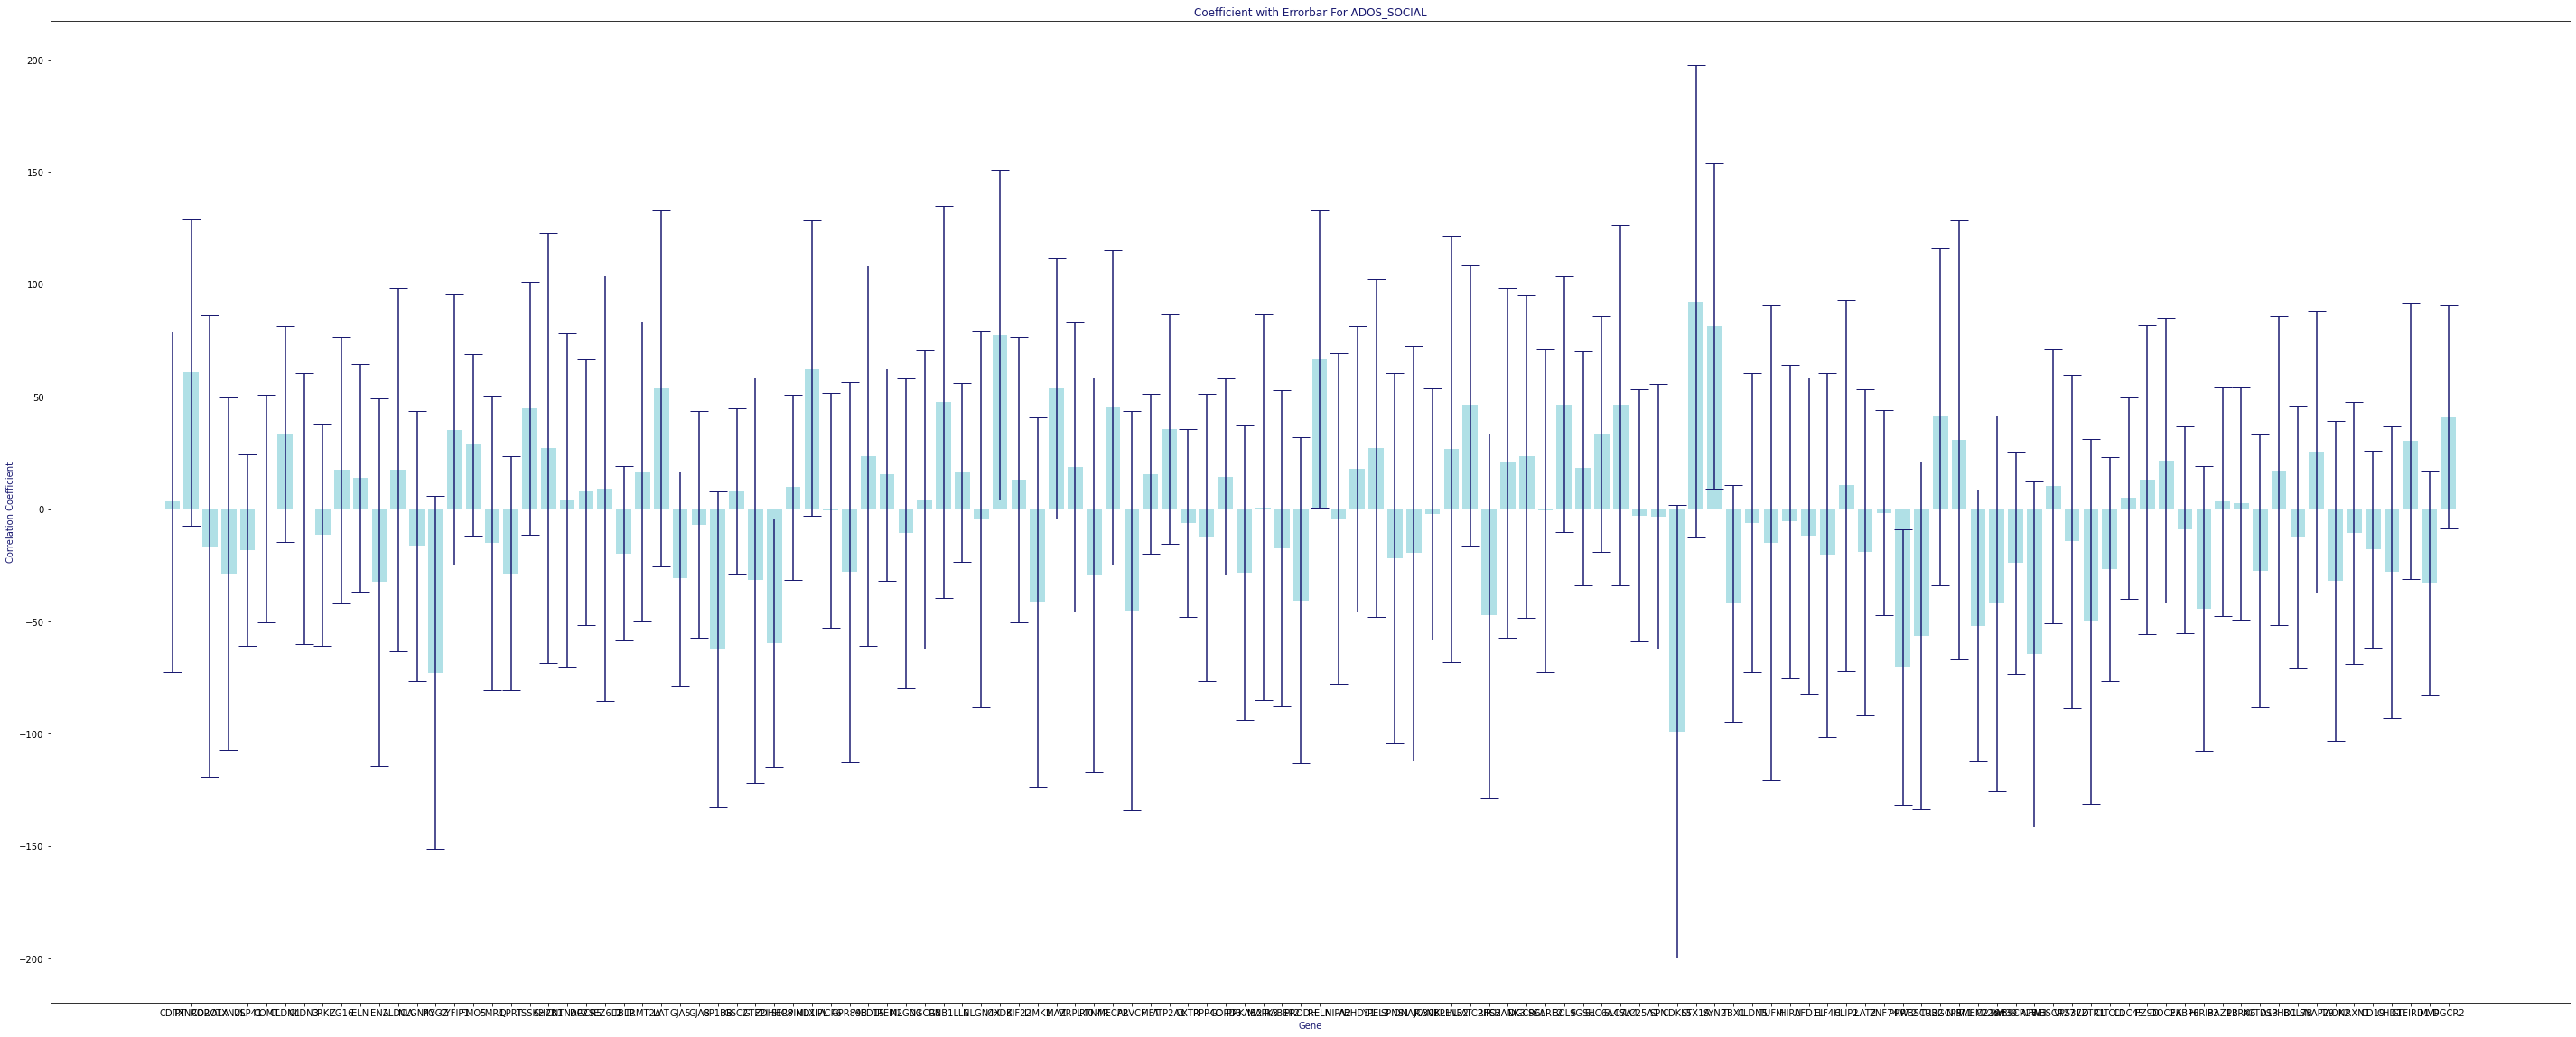

In [63]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='midnightblue')
plt.ylabel('Correlation Coefficient',color='midnightblue')
plt.xlabel('Gene',color='midnightblue')

In [64]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est_rrb.fit()
print(est2_rrb.summary())

ADOS_RRB
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.8693
Date:                Mon, 28 Nov 2022   Prob (F-statistic):              0.808
Time:                        21:33:36   Log-Likelihood:                -625.39
No. Observations:                 375   AIC:                             1497.
Df Residuals:                     252   BIC:                             1980.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1798      1.260      0.936

In [65]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(50,20))
    plt.bar(xs_rrb,coef_rrb,color='darkseagreen')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='darkgreen')
    plt.xticks(xs_rrb,labels=labels);

Text(0.5, 0, 'Gene')

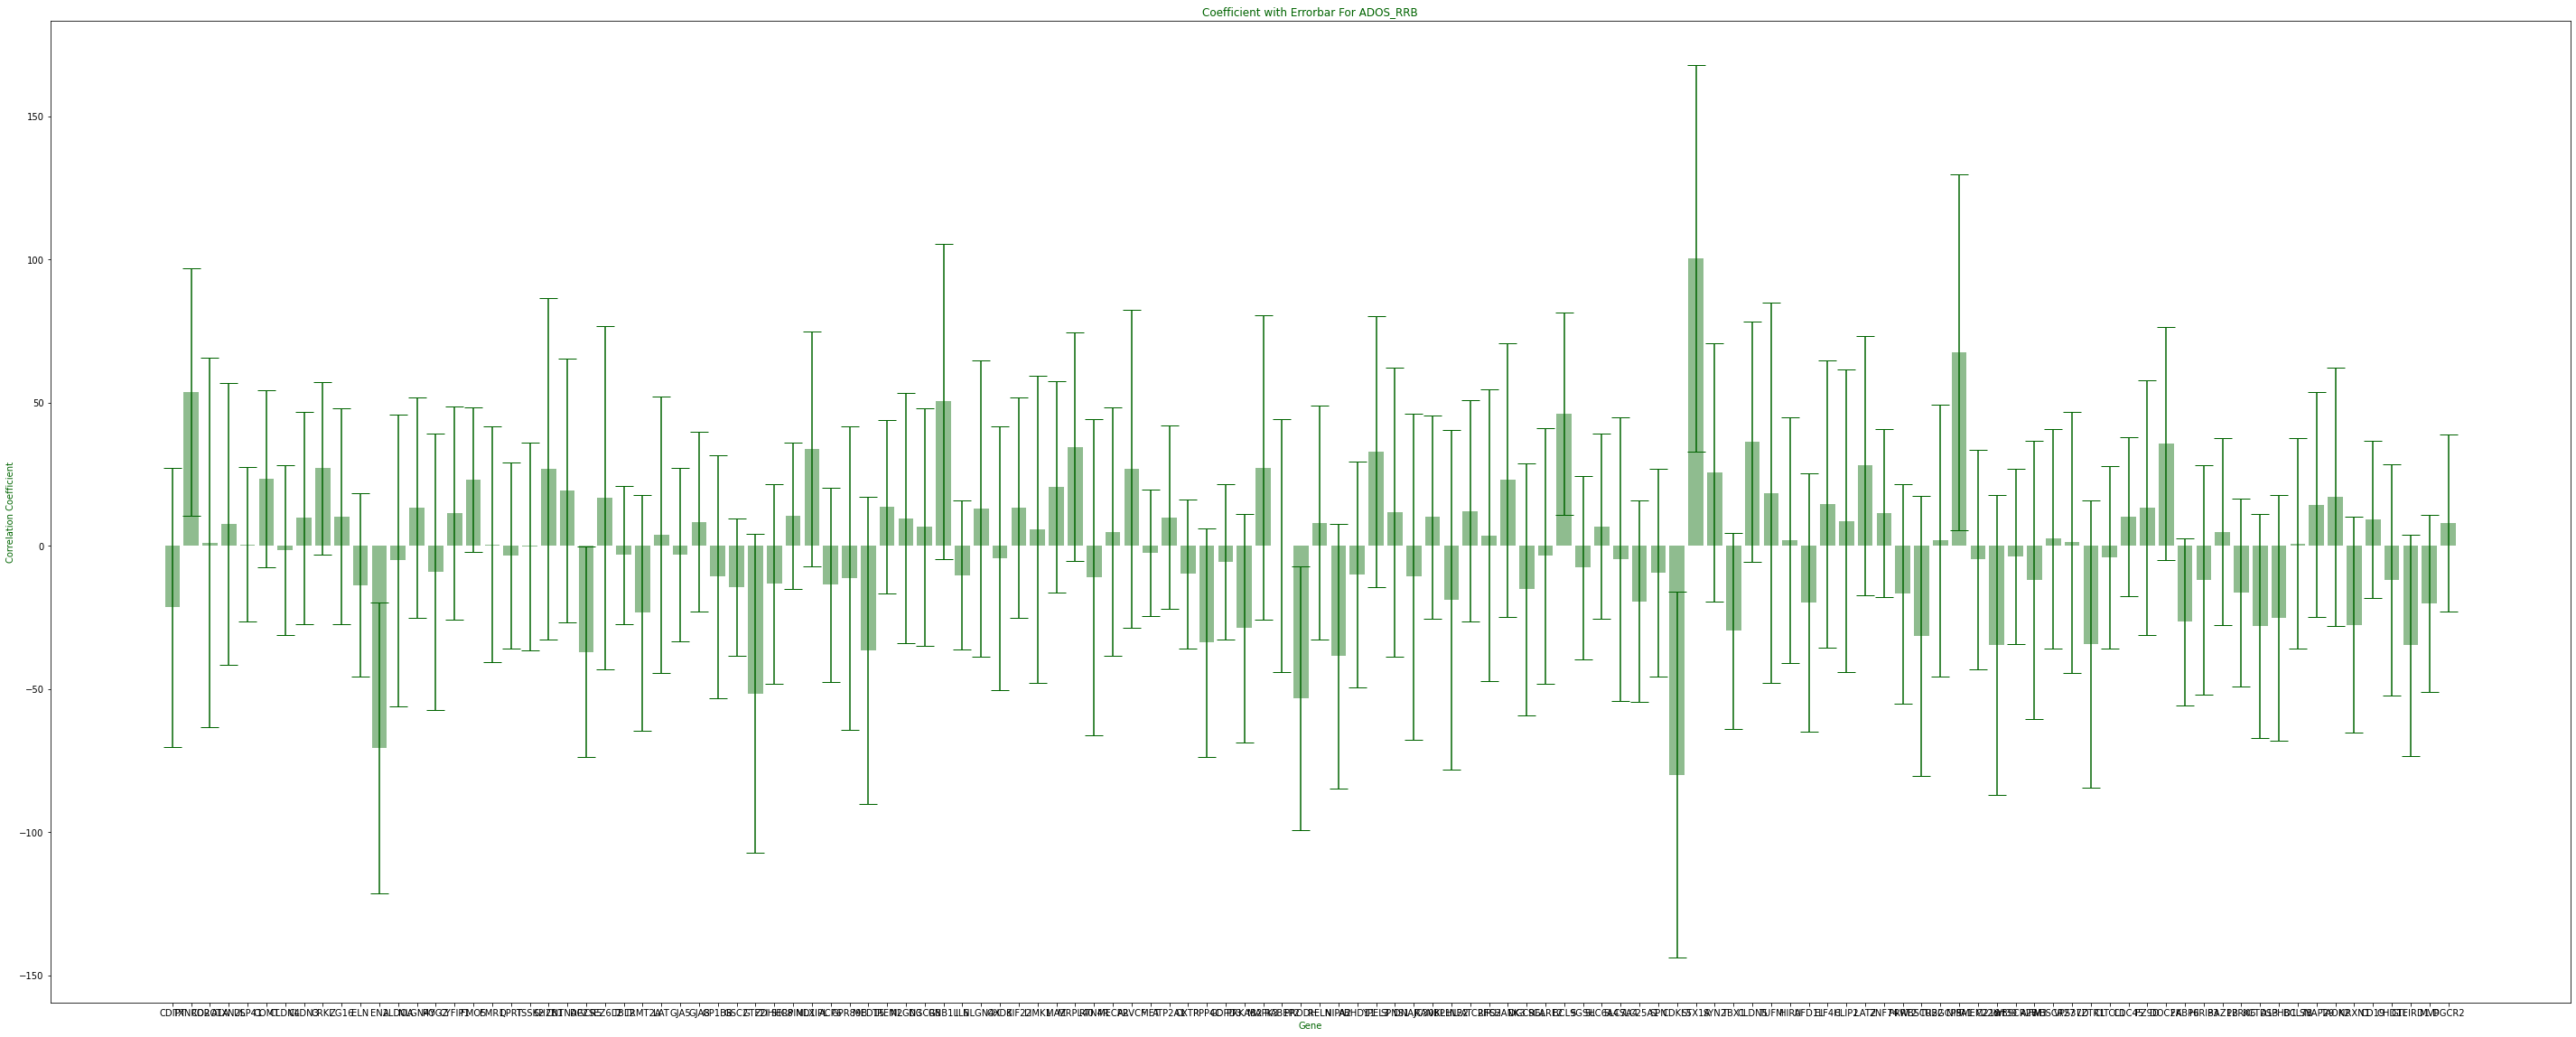

In [66]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='darkgreen')
plt.ylabel('Correlation Coefficient',color='darkgreen')
plt.xlabel('Gene',color='darkgreen')